In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

health = pd.read_csv('Mental health Depression disorder Data.csv')

/var/folders/qs/k20tf5tx1g95_rd5zfrm_4nw0000gn/T/ipykernel_63089/300513165.py:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('Mental health Depression disorder Data.csv')


In [2]:
health.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [3]:
# builting the dataframe
    # create new df with countries we're interested in studying
    # fix the index 
    # added variable for whether it has universal healthcare or not
    
#developed = health.loc[health['Entity'].isin(['United States','Japan','Argentina','Australia','United Kingdom', 'South Korea','Denmark','Canada','France','Taiwan','Uruguay','Germany','Norway','Austria','Belgium','Netherlands', 'Finland','Thailand','United Arab Emirates', 'Sweden', 'Switzerland', 'Chile', 'Costa Rica', 'Mexico', 'Ireland', 'Italy', 'Spain', 'Portugal', 'Brazil', 'Israel','Luxembourg','Singapore', 'New Zealand', 'Monaco', 'Iceland', 'Qatar', 'Jordan', 'Poland', 'Croatia', 'Greece', 'Czech Republic', 'Hungary', 'Estonia'])]
developed = health.loc[health['Entity'].isin(['United States','Japan','Argentina','Australia','United Kingdom', 'South Korea','Denmark','Canada','France','Taiwan','Uruguay','Germany','Norway','Austria','Belgium','Netherlands', 'Finland','Thailand','United Arab Emirates', 'Sweden', 'Switzerland', 'Chile', 'Costa Rica', 'Mexico', 'Ireland', 'Italy', 'Spain', 'Portugal', 'Brazil', 'Israel','Luxembourg','Singapore'])]



developed.head()
developed = developed.reset_index(drop=True)

developed = developed.drop('index', axis=1)

# have universal care or practically universal care (for example may be small co-pays)
developed["Universal Care"] = np.nan

developed["Universal Care"] = np.where(developed['Entity'] == 'United States', 0,1) 




In [4]:
map_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating_dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

developed.rename(columns=map_names,inplace=True)



# just for years 1990 - 2017

developed = developed.loc[developed['year'].isin(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'])] 



In [5]:
# dropping NA
developed1 = developed.dropna()

len(developed1)

896

In [6]:
# using numpy to split into 2 by 70% for training set and the remaining for the rest
developed2 = developed1.sample(frac = 1)
train,test = np.split(developed2,[int(0.80 * len(developed2))])



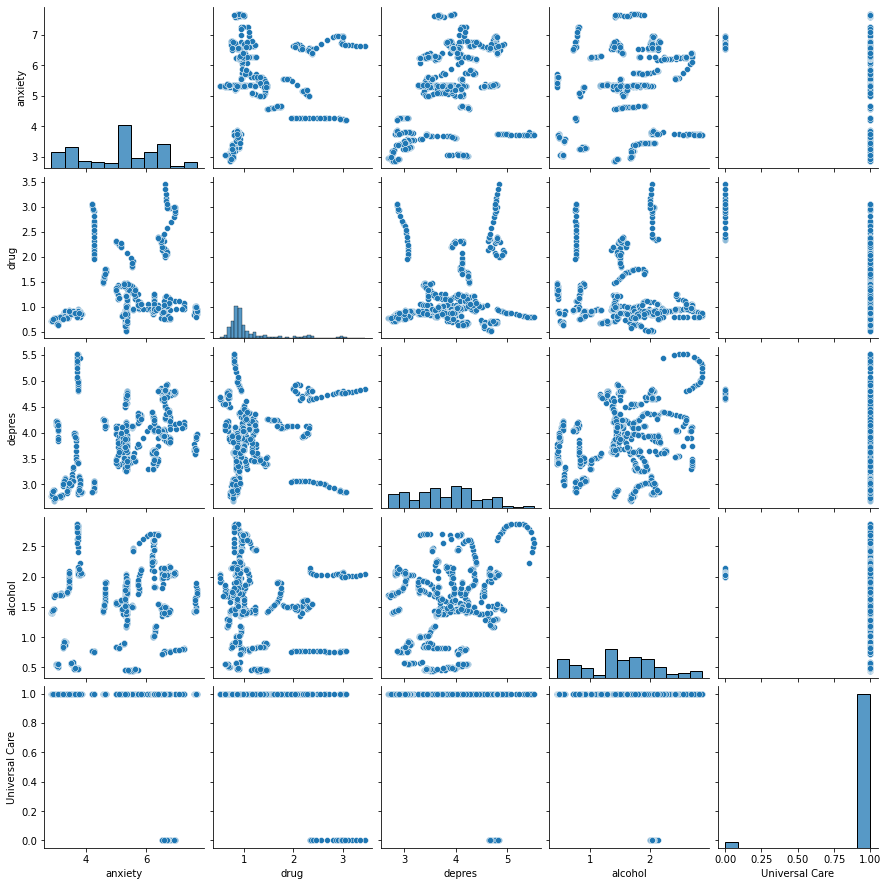

In [7]:
sns.pairplot(train)
plt.show()

In [8]:
ed_obj = smf.ols(formula = 'depres~alcohol+drug+anxiety', data = train).fit()
ed_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     85.80
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.15e-47
Time:                        21:23:12   Log-Likelihood:                -576.16
No. Observations:                 716   AIC:                             1160.
Df Residuals:                     712   BIC:                             1179.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3600      0.092     25.576      0.000       2.179       2.541
alcohol        0.2044      0.034      5.949      0.000       0.137       0.272
drug           0.1290      0.037      3.480      0.001       0.056       0.202
anxiety        0.1919      0.017     11.447      0.000       0.159       0.225
==============================================================================
Omnibus:                       62.992   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.569
Skew:                           0.789   Prob(JB):                     1.43e-17
Kurtosis:                       3.330   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
ed_obj_2 = smf.ols(formula = 'depres~alcohol+drug+anxiety+alcohol*drug+ drug*anxiety + alcohol*anxiety + I(alcohol**3) + +I(alcohol**2) + I(drug**3) + I(drug**2) + I(anxiety**3) + I(anxiety**2)',
                 data = train).fit()
ed_obj_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     80.82
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.42e-123
Time:                        21:23:12   Log-Likelihood:                -376.28
No. Observations:                 716   AIC:                             778.6
Df Residuals:                     703   BIC:                             838.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7614      1.169     -0.651      0.515      -3.057       1.534
alcohol             2.0022      0.448      4.471      0.000       1.123       2.881
drug               -8.8384      0.566    -15.621      0.000      -9.949      -7.728
anxiety             4.2098      0.728      5.781      0.000       2.780       5.640
alcohol:drug        0.5988      0.102      5.843      0.000       0.398       0.800
drug:anxiety        0.1941      0.052      3.712      0.000       0.091       0.297
alcohol:anxiety    -0.0972      0.026     -3.799      0.000      -0.147      -0.047
I(alcohol ** 3)     0.5064      0.065      7.758      0.000       0.378       0.635
I(alcohol ** 2)    -1.9701      0.319     -6.170      0.000      -2.597      -1.343
I(drug ** 3)       -0.7228      0.059    -12.292      0.000      -0.838      -0.607
I(drug ** 2)        4.1043      0.326     12.574      0.000       3.463       4.745
I(anxiety ** 3)     0.0366      0.009      3.979      0.000       0.019       0.055
I(anxiety ** 2)    -0.6853      0.148     -4.638      0.000      -0.975      -0.395
==============================================================================
Omnibus:                       32.171   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.005
Skew:                           0.465   Prob(JB):                     5.59e-09
Kurtosis:                       3.640   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
ed_obj_3 = smf.ols(formula = 'depres~alcohol+drug+anxiety + alcohol*anxiety + drug*anxiety',
                 data = train).fit()
ed_obj_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     70.52
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           6.67e-60
Time:                        21:23:12   Log-Likelihood:                -542.28
No. Observations:                 716   AIC:                             1097.
Df Residuals:                     710   BIC:                             1124.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3161      0.247     13.406      0.000       2.830       3.802
alcohol             0.4649      0.128      3.645      0.000       0.215       0.715
drug               -1.2479      0.171     -7.317      0.000      -1.583      -0.913
anxiety             0.0407      0.047      0.860      0.390      -0.052       0.134
alcohol:anxiety    -0.0624      0.025     -2.455      0.014      -0.112      -0.013
drug:anxiety        0.2470      0.030      8.276      0.000       0.188       0.306
==============================================================================
Omnibus:                       56.011   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.203
Skew:                           0.732   Prob(JB):                     2.55e-15
Kurtosis:                       3.330   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
ols_object4 = smf.ols(formula = 'np.log(depres)~(anxiety+drug+alcohol)**2+I(anxiety**2)', data = train)
model_log4 = ols_object4.fit()
model_log4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(depres)   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     70.30
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           5.79e-77
Time:                        21:28:09   Log-Likelihood:                 453.49
No. Observations:                 716   AIC:                            -891.0
Df Residuals:                     708   BIC:                            -854.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6873      0.084      8.209      0.000       0.523       0.852
anxiety             0.2826      0.032      8.721      0.000       0.219       0.346
drug               -0.3741      0.051     -7.408      0.000      -0.473      -0.275
alcohol            -0.0248      0.038     -0.657      0.511      -0.099       0.049
anxiety:drug        0.0419      0.014      2.970      0.003       0.014       0.070
anxiety:alcohol    -0.0113      0.007     -1.693      0.091      -0.025       0.002
drug:alcohol        0.1058      0.030      3.534      0.000       0.047       0.165
I(anxiety ** 2)    -0.0249      0.003     -7.640      0.000      -0.031      -0.018
==============================================================================
Omnibus:                       81.150   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.796
Skew:                           0.856   Prob(JB):                     1.44e-24
Kurtosis:                       3.867   Cond. No.                         623.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
depres_obj5 = smf.ols(formula = 'np.log(depres)~drug+I(drug**2)+I(drug**3)+I(drug**4)+I(drug**5)+I(drug**6)+anxiety*drug*alcohol', data = train).fit()
depres_obj5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(depres)   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     58.17
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           7.76e-97
Time:                        21:28:19   Log-Likelihood:                 511.45
No. Observations:                 716   AIC:                            -996.9
Df Residuals:                     703   BIC:                            -937.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.7666      0.871      8.920      0.000       6.057       9.476
drug                   -23.0574      3.559     -6.478      0.000     -30.046     -16.069
I(drug ** 2)            31.7095      5.883      5.390      0.000      20.159      43.260
I(drug ** 3)           -23.1071      4.892     -4.724      0.000     -32.711     -13.503
I(drug ** 4)             8.9776      2.140      4.195      0.000       4.776      13.180
I(drug ** 5)            -1.7719      0.470     -3.770      0.000      -2.695      -0.849
I(drug ** 6)             0.1395      0.041      3.422      0.001       0.059       0.220
anxiety                 -0.0868      0.043     -2.016      0.044      -0.171      -0.002
anxiety:drug             0.1948      0.045      4.322      0.000       0.106       0.283
alcohol                 -0.6505      0.140     -4.653      0.000      -0.925      -0.376
anxiety:alcohol          0.1015      0.027      3.732      0.000       0.048       0.155
drug:alcohol             0.8851      0.156      5.689      0.000       0.580       1.190
anxiety:drug:alcohol    -0.1367      0.029     -4.668      0.000      -0.194      -0.079
==============================================================================
Omnibus:                      118.438   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.349
Skew:                           0.971   Prob(JB):                     3.17e-49
Kurtosis:                       4.927   Cond. No.                     3.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
ed_obj_7 = smf.ols(formula = 'depres~alcohol+drug+anxiety+alcohol*drug+ drug*anxiety + alcohol*anxiety + I(alcohol**3) + +I(alcohol**2) + I(drug**3) + I(drug**2)+ I(drug**3)+I(drug**4)+I(drug**5)+ I(anxiety**3) + I(anxiety**2)',
                 data = train).fit()
ed_obj_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     86.19
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          7.11e-142
Time:                        21:23:12   Log-Likelihood:                -328.22
No. Observations:                 716   AIC:                             686.4
Df Residuals:                     701   BIC:                             755.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.6864      1.552      4.952      0.000       4.639      10.734
alcohol             2.2595      0.421      5.371      0.000       1.433       3.085
drug              -36.5575      3.844     -9.511      0.000     -44.104     -29.011
anxiety             4.2315      0.682      6.203      0.000       2.892       5.571
alcohol:drug        0.5720      0.097      5.894      0.000       0.381       0.763
drug:anxiety        0.1760      0.049      3.588      0.000       0.080       0.272
alcohol:anxiety    -0.0851      0.024     -3.545      0.000      -0.132      -0.038
I(alcohol ** 3)     0.5444      0.061      8.880      0.000       0.424       0.665
I(alcohol ** 2)    -2.1483      0.300     -7.161      0.000      -2.737      -1.559
I(drug ** 3)      -18.1501      2.944     -6.164      0.000     -23.931     -12.369
I(drug ** 2)       36.9847      4.942      7.484      0.000      27.282      46.688
I(drug ** 4)        4.2015      0.821      5.118      0.000       2.590       5.813
I(drug ** 5)       -0.3733      0.087     -4.313      0.000      -0.543      -0.203
I(anxiety ** 3)     0.0398      0.009      4.615      0.000       0.023       0.057
I(anxiety ** 2)    -0.7127      0.138     -5.148      0.000      -0.984      -0.441
==============================================================================
Omnibus:                       54.572   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.003
Skew:                           0.532   Prob(JB):                     1.05e-20
Kurtosis:                       4.397   Cond. No.                     9.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
depres_obj9 = smf.ols(formula = 'np.log(depres)~drug+I(drug**2)+I(drug**3)+I(drug**4)+anxiety*drug*alcohol', data = train).fit()
depres_obj9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(depres)   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     60.70
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.55e-88
Time:                        21:28:58   Log-Likelihood:                 486.92
No. Observations:                 716   AIC:                            -951.8
Df Residuals:                     705   BIC:                            -901.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.0493      0.212     14.414      0.000       2.634       3.465
drug                    -4.7543      0.458    -10.390      0.000      -5.653      -3.856
I(drug ** 2)             3.4762      0.487      7.138      0.000       2.520       4.432
I(drug ** 3)            -1.2309      0.190     -6.473      0.000      -1.604      -0.858
I(drug ** 4)             0.1521      0.026      5.959      0.000       0.102       0.202
anxiety                 -0.0189      0.043     -0.436      0.663      -0.104       0.066
anxiety:drug             0.1210      0.045      2.671      0.008       0.032       0.210
alcohol                 -0.3854      0.139     -2.770      0.006      -0.659      -0.112
anxiety:alcohol          0.0553      0.027      2.027      0.043       0.002       0.109
drug:alcohol             0.5622      0.154      3.660      0.000       0.261       0.864
anxiety:drug:alcohol    -0.0816      0.029     -2.798      0.005      -0.139      -0.024
==============================================================================
Omnibus:                       78.624   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.650
Skew:                           0.774   Prob(JB):                     4.68e-26
Kurtosis:                       4.230   Cond. No.                     3.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
ed_obj_8 = smf.ols(formula = 'depres~alcohol+drug+anxiety+alcohol*drug+ drug*anxiety + alcohol*anxiety + I(alcohol**3) + +I(alcohol**2) + I(drug**3) + I(drug**2)+ I(drug**3)+I(drug**4)+ I(anxiety**3) + I(anxiety**2)',
                 data = train).fit()
ed_obj_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     89.16
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          6.51e-139
Time:                        21:24:48   Log-Likelihood:                -337.59
No. Observations:                 716   AIC:                             703.2
Df Residuals:                     702   BIC:                             767.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3659      1.201      2.804      0.005       1.009       5.723
alcohol             2.1220      0.425      4.996      0.000       1.288       2.956
drug              -21.2353      1.485    -14.297      0.000     -24.151     -18.319
anxiety             4.2983      0.691      6.225      0.000       2.943       5.654
alcohol:drug        0.5217      0.098      5.349      0.000       0.330       0.713
drug:anxiety        0.1884      0.050      3.801      0.000       0.091       0.286
alcohol:anxiety    -0.0838      0.024     -3.447      0.001      -0.131      -0.036
I(alcohol ** 3)     0.5268      0.062      8.506      0.000       0.405       0.648
I(alcohol ** 2)    -2.0494      0.303     -6.767      0.000      -2.644      -1.455
I(drug ** 3)       -5.6752      0.556    -10.205      0.000      -6.767      -4.583
I(drug ** 2)       16.5539      1.425     11.617      0.000      13.756      19.352
I(drug ** 4)        0.6762      0.076      8.950      0.000       0.528       0.824
I(anxiety ** 3)     0.0399      0.009      4.561      0.000       0.023       0.057
I(anxiety ** 2)    -0.7201      0.140     -5.138      0.000      -0.995      -0.445
==============================================================================
Omnibus:                       48.016   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.906
Skew:                           0.518   Prob(JB):                     2.43e-16
Kurtosis:                       4.156   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
pred = ed_obj_8.predict(test)
np.sqrt(((test.depres - pred)**2).mean())

0.40302398514379273

In [20]:
pred2 = ed_obj_2.predict(test)
np.sqrt(((test.depres - pred2)**2).mean())

0.4231544221886692

In [21]:
pred3 = ed_obj_3.predict(test)
np.sqrt(((test.depres - pred3)**2).mean())

0.5351205467228806

In [24]:
pred7 = ed_obj_7.predict(test)
np.sqrt(((test.depres - pred7)**2).mean())

0.40302398514379273

In [26]:
pred9 = depres_obj9.predict(test) #log
np.sqrt(((test.depres - pred9)**2).mean())

2.529038645653796